<a href="https://colab.research.google.com/github/everestso/Fall2021/blob/main/SVM10202021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import cvxopt as cvxopt
import pylab as pl

-1.0 [ 0.04967142 -0.01382643]
-1.0 [0.06476885 0.15230299]
-1.0 [-0.02341534 -0.0234137 ]
-1.0 [0.15792128 0.07674347]
-1.0 [-0.04694744  0.054256  ]
-1.0 [-0.04634177 -0.04657298]
-1.0 [ 0.02419623 -0.19132802]
1.0 [-0.17249178  0.94377125]
1.0 [-0.10128311  1.03142473]
1.0 [-0.09080241  0.85876963]
1.0 [0.14656488 0.97742237]
1.0 [0.00675282 0.85752518]
1.0 [-0.05443827  1.01109226]
1.0 [-0.11509936  1.0375698 ]
1.0 [-0.06006387  0.97083063]
1.0 [0.93982934 0.18522782]
1.0 [ 0.99865028 -0.10577109]
1.0 [ 1.08225449 -0.12208436]
1.0 [ 1.02088636 -0.19596701]
1.0 [0.8671814  0.01968612]
1.0 [1.07384666 0.01713683]
1.0 [ 0.98843517 -0.03011037]
1.0 [0.8521478  0.92801558]
1.0 [0.95393612 1.10571222]
1.0 [1.03436183 0.82369598]
1.0 [1.0324084  0.96149177]
1.0 [0.9323078  1.06116763]
1.0 [1.10309995 1.09312801]
1.0 [0.91607825 0.96907876]
1.0 [1.03312634 1.09755451]


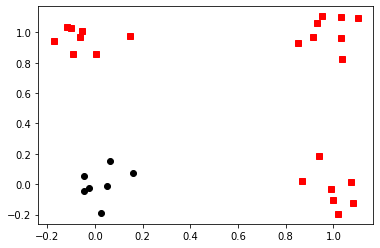

In [24]:
  np.random.seed(42)
  m = 30
  sdev=0.1

  X = sdev*np.random.randn(m,2)
  X[m//2:,0] += 1.
  X[m//4:m//2,1] += 1.
  X[3*m//4:,1] += 1.
  targets = -np.ones((m,1))
  targets[m//4:,0] = 1.
  #targets = (np.where(X[:,0]*X[:,1]>=0,1,-1)*np.ones((1,np.shape(X)[0]))).T
  data = [(list(X[i]), targets[i][0]) for i in range(m)]
  for i in range(m): print (targets[i,0], X[i])
  
  l1 =  np.where(targets==1)[0]
  l2 =  np.where(targets==-1)[0]
  pl.plot(X[l1,0],X[l1,1],'rs')
  pl.plot(X[l2,0],X[l2,1],'ko')
  pl.show()

In [25]:
K = np.dot(X,X.T)
P=targets*targets.transpose()*K
q = -np.ones((m,1))
G = -np.eye(m)
h = np.zeros((m,1))

A = targets.reshape(1,m)
b = 0.0

In [26]:
sol = cvxopt.solvers.qp(cvxopt.matrix(P),cvxopt.matrix(q),cvxopt.matrix(G),cvxopt.matrix(h), cvxopt.matrix(A), cvxopt.matrix(b))
print(sol)

     pcost       dcost       gap    pres   dres
 0: -9.7684e+00 -2.0547e+01  8e+01  8e+00  2e+00
 1: -1.0277e+01 -1.6264e+01  2e+01  1e+00  3e-01
 2: -1.0179e+01 -1.3633e+01  6e+00  3e-01  7e-02
 3: -1.2326e+01 -1.2987e+01  8e-01  2e-02  5e-03
 4: -1.2721e+01 -1.2752e+01  4e-02  5e-04  1e-04
 5: -1.2745e+01 -1.2746e+01  4e-04  5e-06  1e-06
 6: -1.2746e+01 -1.2746e+01  4e-06  5e-08  1e-08
Optimal solution found.
{'x': <30x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <30x1 matrix, tc='d'>, 'z': <30x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 3.5600547765144174e-06, 'relative gap': 2.7931354819142853e-07, 'primal objective': -12.745728947149106, 'dual objective': -12.745732087580226, 'primal infeasibility': 4.9085536906199196e-08, 'dual infeasibility': 1.1453504545784197e-08, 'primal slack': 2.5027200201587364e-08, 'dual slack': 1.0270529052832127e-08, 'iterations': 6}


In [33]:
threshold=1e-5
threshold=1e-3

# Get the Lagrange multipliers out of the solution dictionary
lambdas = np.array(sol['x'])

# Find the (indices of the) support vectors, which are the vectors with non-zero Lagrange multipliers
sv = np.where(lambdas>threshold)[0]
nsupport = len(sv)
print (nsupport, "support vectors found" )

# Just retain the data corresponding to the support vectors
SVMx = X[sv,:]
SVMlambdas = lambdas[sv]
SVMtargets = targets[sv]

    #self.b = np.sum(self.targets)
    #for n in range(self.nsupport):
    #self.b -= np.sum(self.lambdas*self.targets.T*np.reshape(self.K[self.sv[n],self.sv],(self.nsupport,1)))
    #self.b /= len(self.lambdas)
    #print "b=",self.b

b = np.sum(SVMtargets)
for n in range(nsupport):
  b -= np.sum(SVMlambdas*SVMtargets*np.reshape(K[sv[n],sv],(nsupport,1)))
b /= len(SVMlambdas)

3 support vectors found


In [39]:
print(SVMlambdas)
roundedLambdas = [round(l[0],3) for l in SVMlambdas]
print (roundedLambdas)
print (round(b,3))
print (SVMx)

[[12.7457279 ]
 [ 6.76812058]
 [ 5.97759689]]
[12.746, 6.768, 5.978]
-1.83
[[ 0.15792128  0.07674347]
 [-0.09080241  0.85876963]
 [ 1.02088636 -0.19596701]]


In [51]:
#SVM for Prediction
x = (0.04967142, -0.01382643 )

K = lambda a, b: np.dot(np.transpose(a), b)
def Predict(SVx, SVl, SVt, b, x):
  tot = 0
  for i in range(len(SVx)):
    tot += SVt[i] * SVl[i] * K(SVx[i], x)
  #print (tot)
  #print (tot + b)
  #print (SVt[i])
  return tot+b

for x, r in zip(X, targets):
  print(x, Predict(SVMx,SVMlambdas, SVMtargets, b, x), r)


[ 0.04967142 -0.01382643] [-1.70790331] [-1.]
[0.06476885 0.15230299] [-1.04695767] [-1.]
[-0.02341534 -0.0234137 ] [-1.99699965] [-1.]
[0.15792128 0.07674347] [-0.99999835] [-1.]
[-0.04694744  0.054256  ] [-1.79429492] [-1.]
[-0.04634177 -0.04657298] [-2.1614958] [-1.]
[ 0.02419623 -0.19132802] [-2.44656509] [-1.]
[-0.17249178  0.94377125] [1.02745188] [1.]
[-0.10128311  1.03142473] [1.59595438] [1.]
[-0.09080241  0.85876963] [0.99999283] [1.]
[0.14656488 0.97742237] [2.25944787] [1.]
[0.00675282 0.85752518] [1.33444544] [1.]
[-0.05443827  1.01109226] [1.68427157] [1.]
[-0.11509936  1.0375698 ] [1.57044955] [1.]
[-0.06006387  0.97083063] [1.51725625] [1.]
[0.93982934 0.18522782] [2.11452691] [1.]
[ 0.99865028 -0.10577109] [1.25309369] [1.]
[ 1.08225449 -0.12208436] [1.48387316] [1.]
[ 1.02088636 -0.19596701] [1.00000552] [1.]
[0.8671814  0.01968612] [1.25574223] [1.]
[1.07384666 0.01713683] [1.96457992] [1.]
[ 0.98843517 -0.03011037] [1.49471757] [1.]
[0.8521478  0.92801558] [4.530431

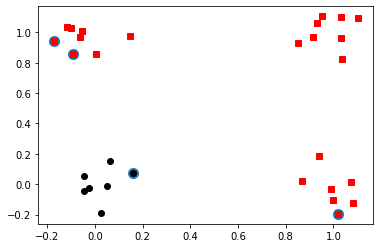

In [6]:
pl.figure()
l1 =  np.where(targets==1)[0]
l2 =  np.where(targets==-1)[0]
pl.plot(X[sv,0],X[sv,1],'o',markeredgewidth=5)
pl.plot(X[l1,0],X[l1,1],'rs')
pl.plot(X[l2,0],X[l2,1],'ko')
pl.show()

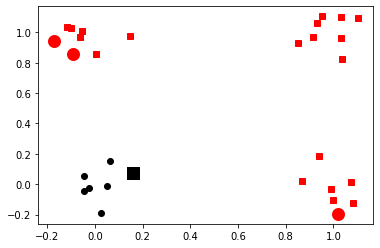

In [7]:
pl.figure()
l1 =  np.where(targets==1)[0]
l2 =  np.where(targets==-1)[0]
pl.plot(X[l1,0],X[l1,1],'rs')
pl.plot(X[l2,0],X[l2,1],'ko')

svTargets=targets[sv]
svX=X[sv,:]
l1 =  np.where(svTargets==1)[0]
l2 =  np.where(svTargets==-1)[0]
pl.plot(svX[l1,0],svX[l1,1],'ro',markeredgewidth=7)
pl.plot(svX[l2,0],svX[l2,1],'ks',markeredgewidth=7)
#pl.plot(X[sv,0],X[sv,1],'o',markeredgewidth=5)
pl.show()

# SVM Optimization 

${}_{(Ethem Alpaydin: 14.3)} $ min $\frac{1}{2}\| \mathbf{w} \| ^2$ subject to $r^t (\mathbf{w}^T\mathbf{x}^t +w_0) \ge +1, \forall{t}$ 

minimise  $\frac{1}{2} \mathbf{w}^T\mathbf{w}$ subject to $t_i (\mathbf{w}^T\mathbf{x_i} +b) \ge 1$ for all $i=1, \ldots n$. ${}_{(8.1: Stephen Marsland)}$ 

#Dual (Lagrangian)


${}_{(Ethem Alpaydin: 14.7)} $
 $-\frac{1}{2} \sum_t\sum_s\alpha^t\alpha^sr^tr^s(x^t)^Tx^s + \sum_t\alpha^t 
$ 

maximize with respect to $\alpha^t$

Subject to constraints:
$\sum_t\alpha^t r^t = 0, \alpha^t \ge 0, \forall t$


$\sum_{i=1}^n\lambda_i -\frac{1}{2} \sum_{i=1}^n\sum_{j=1}^n\lambda_i\lambda_jt_it_j(x_i)^Tx_j 
$ ${}_{(8.9: Stephen Marsland)}$  

maximise with respect to $\lambda_i$

Subject to constraints:
$\lambda_i \ge 0, \forall i$ and $\sum_{i=1}^n\lambda_it_i = 0$

In [8]:
w =np.sum(SVMlambdas*SVMtargets*svX,axis=0)
print(w, b)
print(SVMlambdas)

[3.47506191 3.66270349] -1.836739552345819
[[1.27457279e+01]
 [1.09291806e-05]
 [6.76812058e+00]
 [5.97759689e+00]]


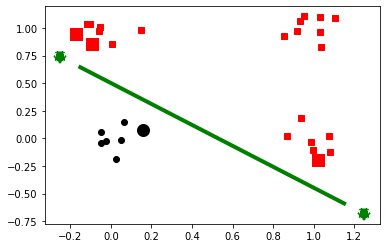

In [9]:
f = lambda xIn: -b/w[1] - w[0]/w[1]*xIn

xLd = [f(i) for i in np.arange( -0.15, 1.25, 0.1)]
l1 =  np.where(targets==1)[0]
l2 =  np.where(targets==-1)[0]
pl.plot(X[l1,0],X[l1,1],'rs')
pl.plot(X[l2,0],X[l2,1],'ko')

svTargets=targets[sv]
svX=X[sv,:]
l1 =  np.where(svTargets==1)[0]
l2 =  np.where(svTargets==-1)[0]
pl.plot(svX[l1,0],svX[l1,1],'rs',markeredgewidth=7)
pl.plot(svX[l2,0],svX[l2,1],'ko',markeredgewidth=7)
pl.plot(np.arange( -0.15, 1.25, 0.1), xLd,"g-", linewidth=4)
pl.plot([-0.25, 1.25], [f(-0.25), f(1.25)], "g*", markeredgewidth=10 )
pl.show()

# Now XOR

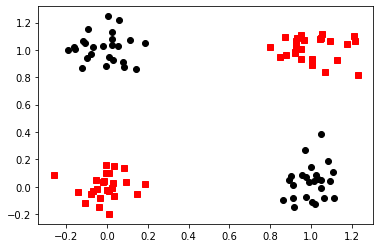

In [10]:
m = 100
X = sdev*np.random.randn(m,2)
X[m//2:,0] += 1.
X[m//4:m//2,1] += 1.
X[3*m//4:,1] += 1.
targets = -np.ones((m,1))
targets[:m//4,0] = 1.
targets[3*m//4:,0] = 1.
#targets = (np.where(X[:,0]*X[:,1]>=0,1,-1)*np.ones((1,np.shape(X)[0]))).T
l1 =  np.where(targets==1)[0]
l2 =  np.where(targets==-1)[0]
pl.plot(X[l1,0],X[l1,1],'rs')
pl.plot(X[l2,0],X[l2,1],'ko')
pl.show()

# Linear Kernel

In [11]:
K = np.dot(X,X.T)
P=targets*targets.transpose()*K
q = -np.ones((m,1))
G = -np.eye(m)
h = np.zeros((m,1))

A = targets.reshape(1,m)
b = 0.0

In [12]:
#Solve Quadratic Opt
sol = cvxopt.solvers.qp(cvxopt.matrix(P),cvxopt.matrix(q),cvxopt.matrix(G),cvxopt.matrix(h), cvxopt.matrix(A), cvxopt.matrix(b))
print(sol)

     pcost       dcost       gap    pres   dres
 0: -9.9961e+01 -2.0285e+02  1e+02  2e-15  2e+00
 1: -2.4457e+02 -2.4761e+02  3e+00  1e-14  1e+00
 2: -1.9877e+04 -1.9881e+04  4e+00  4e-12  1e+00
 3: -1.0243e+08 -1.0243e+08  2e+02  3e-08  1e+00
 4: -2.4520e+10 -2.4520e+10  5e+04  4e-06  1e+00
Terminated (singular KKT matrix).
{'x': <100x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <100x1 matrix, tc='d'>, 'z': <100x1 matrix, tc='d'>, 'status': 'unknown', 'gap': 46156.0376342772, 'relative gap': 1.8823876030699105e-06, 'primal objective': -24519943479.761112, 'dual objective': -24519989635.798748, 'primal infeasibility': 3.6954879760742188e-06, 'dual infeasibility': 1.0000018825500763, 'primal slack': 236324587.38071543, 'dual slack': 1.5639420636160734e-08, 'iterations': 4}


In [13]:
#Build Model
threshold=1e-5

# Get the Lagrange multipliers out of the solution dictionary
lambdas = np.array(sol['x'])

# Find the (indices of the) support vectors, which are the vectors with non-zero Lagrange multipliers
sv = np.where(lambdas>threshold)[0]
nsupport = len(sv)
print (nsupport, "support vectors found" )

# Just retain the data corresponding to the support vectors
SVMx = X[sv,:]
SVMlambdas = lambdas[sv]
SVMtargets = targets[sv]

    #self.b = np.sum(self.targets)
    #for n in range(self.nsupport):
    #self.b -= np.sum(self.lambdas*self.targets.T*np.reshape(self.K[self.sv[n],self.sv],(self.nsupport,1)))
    #self.b /= len(self.lambdas)
    #print "b=",self.b

b = np.sum(SVMtargets)
for n in range(nsupport):
  b -= np.sum(SVMlambdas*SVMtargets*np.reshape(K[sv[n],sv],(nsupport,1)))
b /= len(SVMlambdas)

100 support vectors found


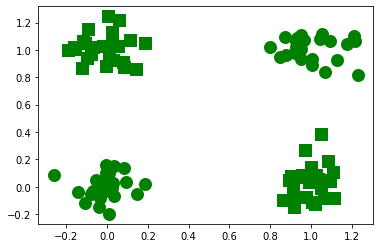

In [14]:
pl.figure()
l1 =  np.where(targets==1)[0]
l2 =  np.where(targets==-1)[0]
pl.plot(X[l1,0],X[l1,1],'rs')
pl.plot(X[l2,0],X[l2,1],'ko')

svTargets=targets[sv]
svX=X[sv,:]
l1 =  np.where(svTargets==1)[0]
l2 =  np.where(svTargets==-1)[0]
pl.plot(svX[l1,0],svX[l1,1],'go',markeredgewidth=7)
pl.plot(svX[l2,0],svX[l2,1],'gs',markeredgewidth=7)
#pl.plot(X[sv,0],X[sv,1],'o',markeredgewidth=5)
pl.show()

# RBF

In [15]:
#Linear Kernel
K = np.dot(X,X.T)


In [16]:
# RBF Kernel
sigma = 1.0
xsquared = (np.diag(K)*np.ones((1,m))).T
b = np.ones((m,1))
K -= 0.5*(np.dot(xsquared,b.T) + np.dot(b,xsquared.T))
K = np.exp(K/(2.0*sigma**2))

In [17]:
P=targets*targets.transpose()*K
q = -np.ones((m,1))
G = -np.eye(m)
h = np.zeros((m,1))

A = targets.reshape(1,m)
b = 0.0

In [18]:
sol = cvxopt.solvers.qp(cvxopt.matrix(P),cvxopt.matrix(q),cvxopt.matrix(G),cvxopt.matrix(h), cvxopt.matrix(A), cvxopt.matrix(b))
print(sol)

     pcost       dcost       gap    pres   dres
 0: -3.5356e+01 -9.6994e+01  6e+01  7e-16  2e+00
 1: -4.4388e+01 -6.8624e+01  2e+01  2e-15  8e-01
 2: -5.7620e+01 -8.4193e+01  3e+01  2e-15  7e-01
 3: -1.0594e+02 -1.2913e+02  2e+01  8e-15  3e-01
 4: -1.2251e+02 -1.3674e+02  1e+01  2e-14  1e-01
 5: -1.2888e+02 -1.2964e+02  8e-01  5e-14  5e-03
 6: -1.2918e+02 -1.2919e+02  2e-02  4e-14  7e-05
 7: -1.2919e+02 -1.2919e+02  2e-04  3e-14  7e-07
 8: -1.2919e+02 -1.2919e+02  2e-06  3e-14  7e-09
Optimal solution found.
{'x': <100x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <100x1 matrix, tc='d'>, 'z': <100x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 1.633984005738143e-06, 'relative gap': 1.264822167771046e-08, 'primal objective': -129.1868570439162, 'dual objective': -129.1868586779002, 'primal infeasibility': 2.658607475900514e-14, 'dual infeasibility': 7.162745536663121e-09, 'primal slack': 1.4859560626303346e-09, 'dual slack': 1.7230805040662418e-09, 'iterations': 8}


In [19]:
#Build Model
threshold=1e-5

# Get the Lagrange multipliers out of the solution dictionary
lambdas = np.array(sol['x'])

# Find the (indices of the) support vectors, which are the vectors with non-zero Lagrange multipliers
sv = np.where(lambdas>threshold)[0]
nsupport = len(sv)
print (nsupport, "support vectors found" )

# Just retain the data corresponding to the support vectors
SVMx = X[sv,:]
SVMlambdas = lambdas[sv]
SVMtargets = targets[sv]
SVMxsquared = xsquared[sv]
    #self.b = np.sum(self.targets)
    #for n in range(self.nsupport):
    #self.b -= np.sum(self.lambdas*self.targets.T*np.reshape(self.K[self.sv[n],self.sv],(self.nsupport,1)))
    #self.b /= len(self.lambdas)
    #print "b=",self.b

b = np.sum(SVMtargets)
for n in range(nsupport):
  b -= np.sum(SVMlambdas*SVMtargets*np.reshape(K[sv[n],sv],(nsupport,1)))
b /= len(SVMlambdas)
SVMb = b

6 support vectors found


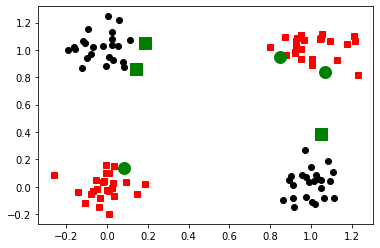

RBF Support Vectors


In [20]:
pl.figure()
l1 =  np.where(targets==1)[0]
l2 =  np.where(targets==-1)[0]
pl.plot(X[l1,0],X[l1,1],'rs')
pl.plot(X[l2,0],X[l2,1],'ko')

svTargets=targets[sv]
svX=X[sv,:]
l1 =  np.where(svTargets==1)[0]
l2 =  np.where(svTargets==-1)[0]
pl.plot(svX[l1,0],svX[l1,1],'go',markeredgewidth=7)
pl.plot(svX[l2,0],svX[l2,1],'gs',markeredgewidth=7)
#pl.plot(X[sv,0],X[sv,1],'o',markeredgewidth=5)
pl.show()
print ("RBF Support Vectors")

In [21]:
def classifier(Y, xSVM, xsquaredSVM, lambdasSVM, targetsSVM, bSVM, sigmaSVM, soft=False):
  nSupportVectors = len(xSVM)
   
  K = np.dot(Y,xSVM.T)
  c = (1./sigma * np.sum(Y**2,axis=1)*np.ones((1,np.shape(Y)[0]))).T
  c = np.dot(c,np.ones((1,np.shape(K)[1])))
  aa = np.dot(xsquaredSVM,np.ones((1,np.shape(K)[0]))).T
  K = K - 0.5*c - 0.5*aa
  K = np.exp(K/(2.*sigma**2))

  y = np.zeros((np.shape(Y)[0],1))
  for j in range(np.shape(Y)[0]):
    for i in range(nSupportVectors):
      y[j] += lambdasSVM[i]*targetsSVM[i]*K[j,i]
    y[j] += bSVM

  if soft:
    return y
  else:
    return np.sign(y)

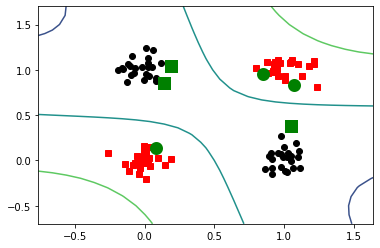

[[0.02499585]
 [0.75895997]
 [1.13182291]
 [1.25409768]
 [1.84542692]
 [1.62470887]]


In [22]:
pl.figure()
l1 =  np.where(targets==1)[0]
l2 =  np.where(targets==-1)[0]
pl.plot(X[l1,0],X[l1,1],'rs')
pl.plot(X[l2,0],X[l2,1],'ko')

svTargets=targets[sv]
svX=X[sv,:]
l1 =  np.where(svTargets==1)[0]
l2 =  np.where(svTargets==-1)[0]
pl.plot(svX[l1,0],svX[l1,1],'go',markeredgewidth=7)
pl.plot(svX[l2,0],svX[l2,1],'gs',markeredgewidth=7)
#pl.plot(X[sv,0],X[sv,1],'o',markeredgewidth=5)

#l1 =  np.where(test==1)[0]
#l2 =  np.where(test==-1)[0]
#pl.plot(Y[l1,0],Y[l1,1],'rs')
#pl.plot(Y[l2,0],Y[l2,1],'ks')

step = 0.1
f0,f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), 
                     np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))

out = classifier(np.c_[np.ravel(f0), np.ravel(f1)], SVMx, SVMxsquared, 
                 SVMlambdas, SVMtargets, SVMb, sigma, soft=True).T
#out = classifier(X, SVMx, SVMxsquared, SVMlambdas, SVMtargets, SVMb, sigma, 
#                 soft=True).T

out = out.reshape(f0.shape)
pl.contour(f0, f1, out,2)

pl.show()

#print (np.c_[np.ravel(f0), np.ravel(f1)])
print (SVMxsquared)

